In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

DATA_PATH = "../data/raw/data.csv"

# Провести разведочный анализ, построить диаграммы распределений пасажиров по каждому из признаков. Построить графики совместного распределения для всех признаков.

In [38]:
df = pd.read_csv(DATA_PATH)
df.drop(["PassengerId"], axis=1, inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
# Get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [40]:
# Check for missing values in each column
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [41]:
# Get descriptive statistics for numerical features
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


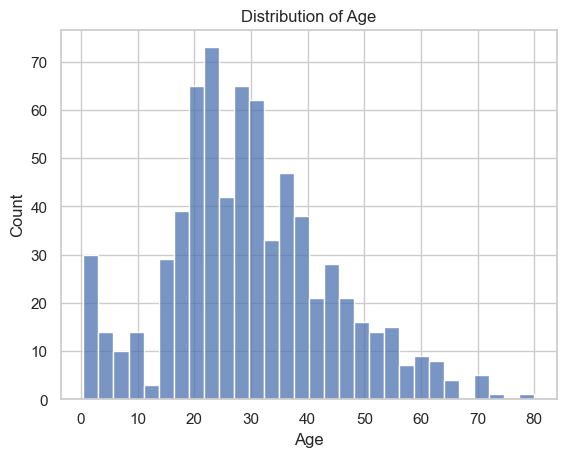

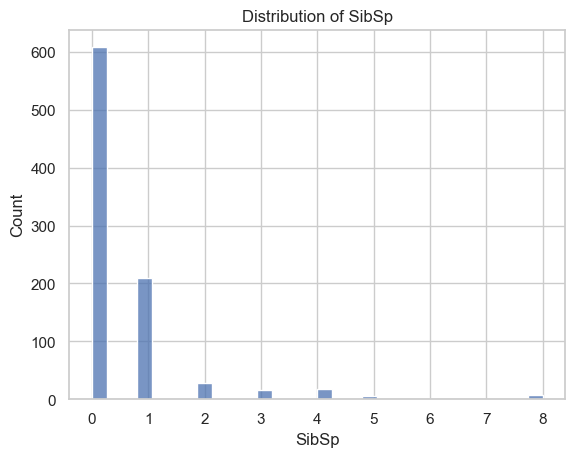

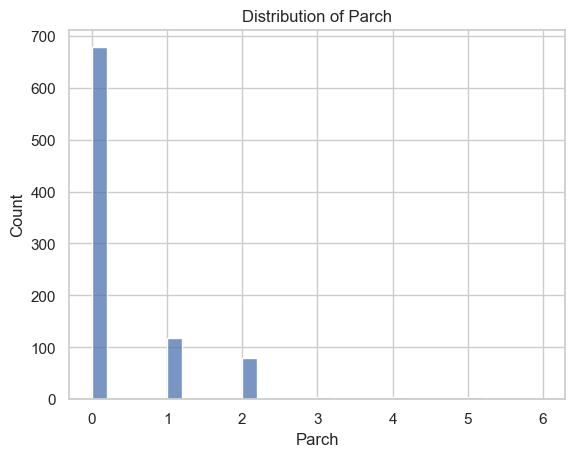

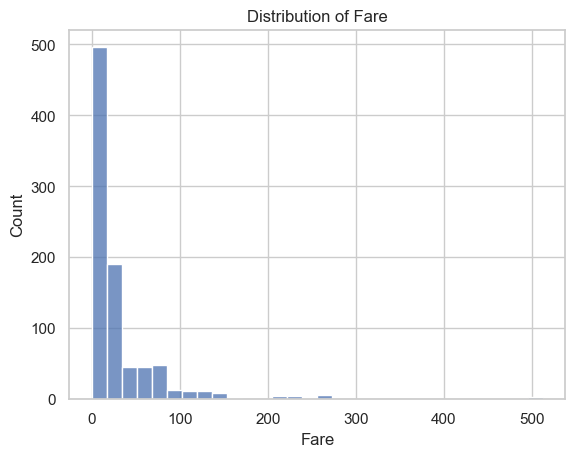

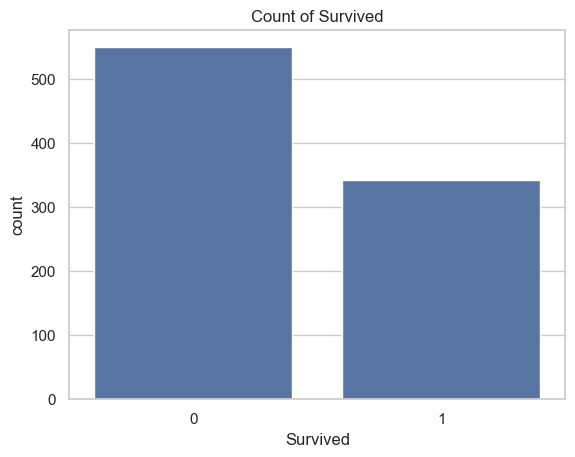

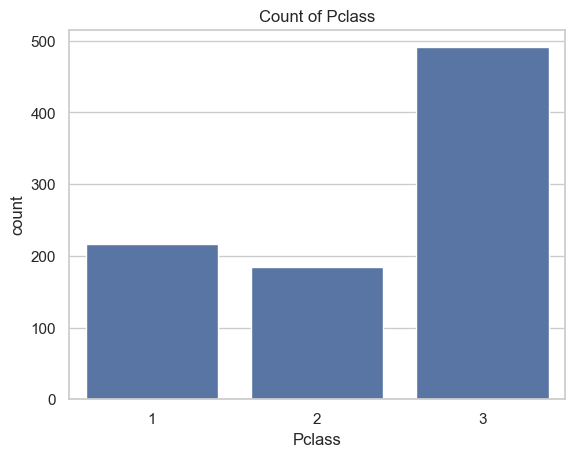

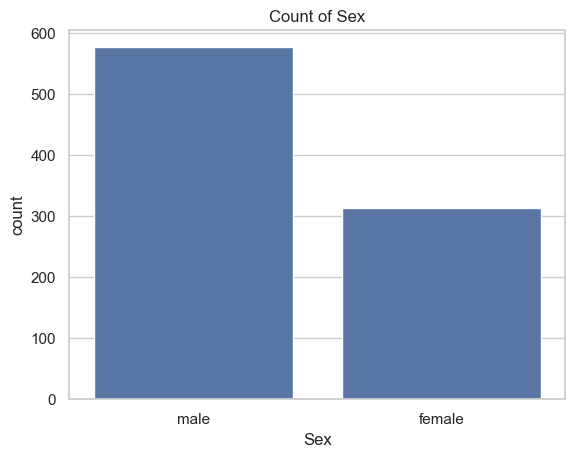

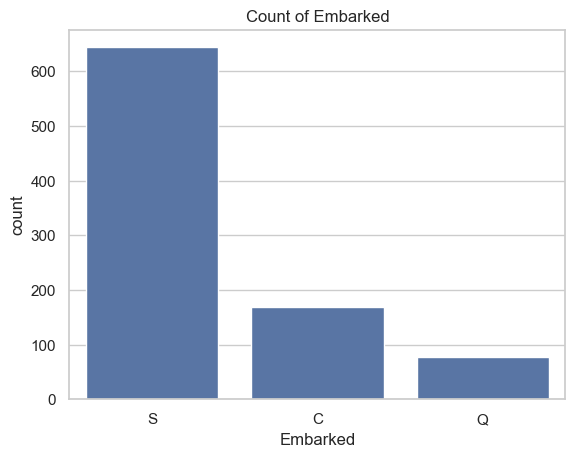

In [49]:
# Set up the matplotlib figure
sns.set(style="whitegrid")

# Histograms for numerical features
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']

for feature in numerical_features:
    sns.histplot(df[feature].dropna(), kde=False, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Count plots for categorical features
categorical_features = ['Survived', 'Pclass', 'Sex', 'Embarked']

for feature in categorical_features:
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature}')
    plt.show()

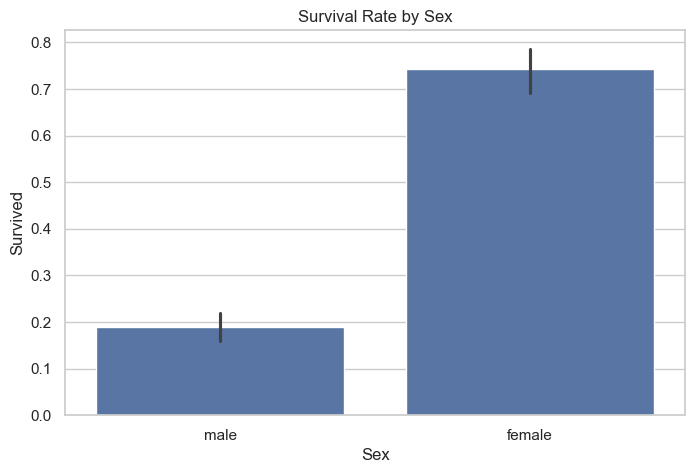

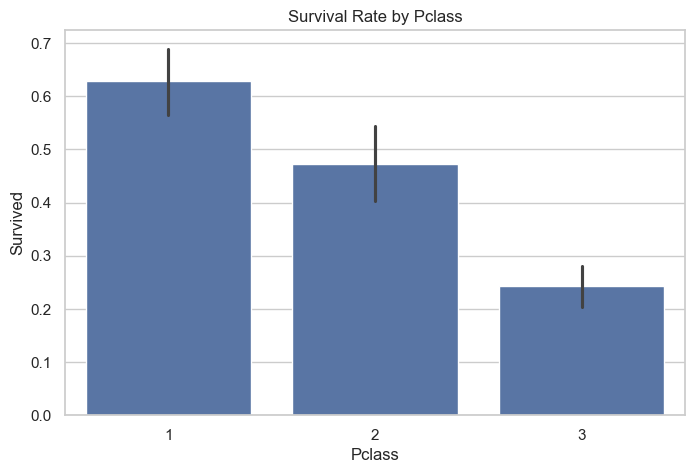

In [52]:
# Bar plot of survival rate by 'Sex'
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

# Bar plot of survival rate by 'Pclass'
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Pclass')
plt.show()

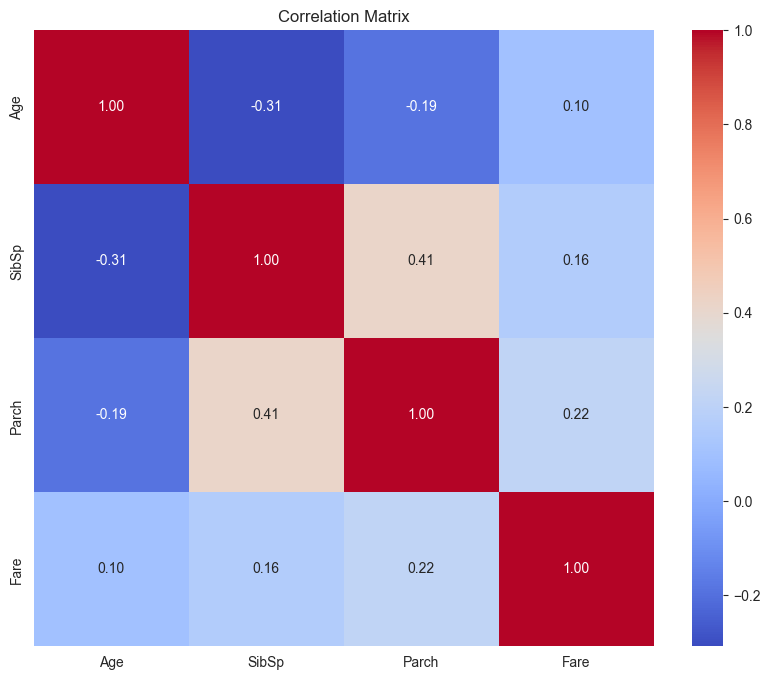

In [48]:
# Compute the correlation matrix for numerical features
corr_matrix = df[['Age', 'SibSp', 'Parch', 'Fare']].corr()

# Draw a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

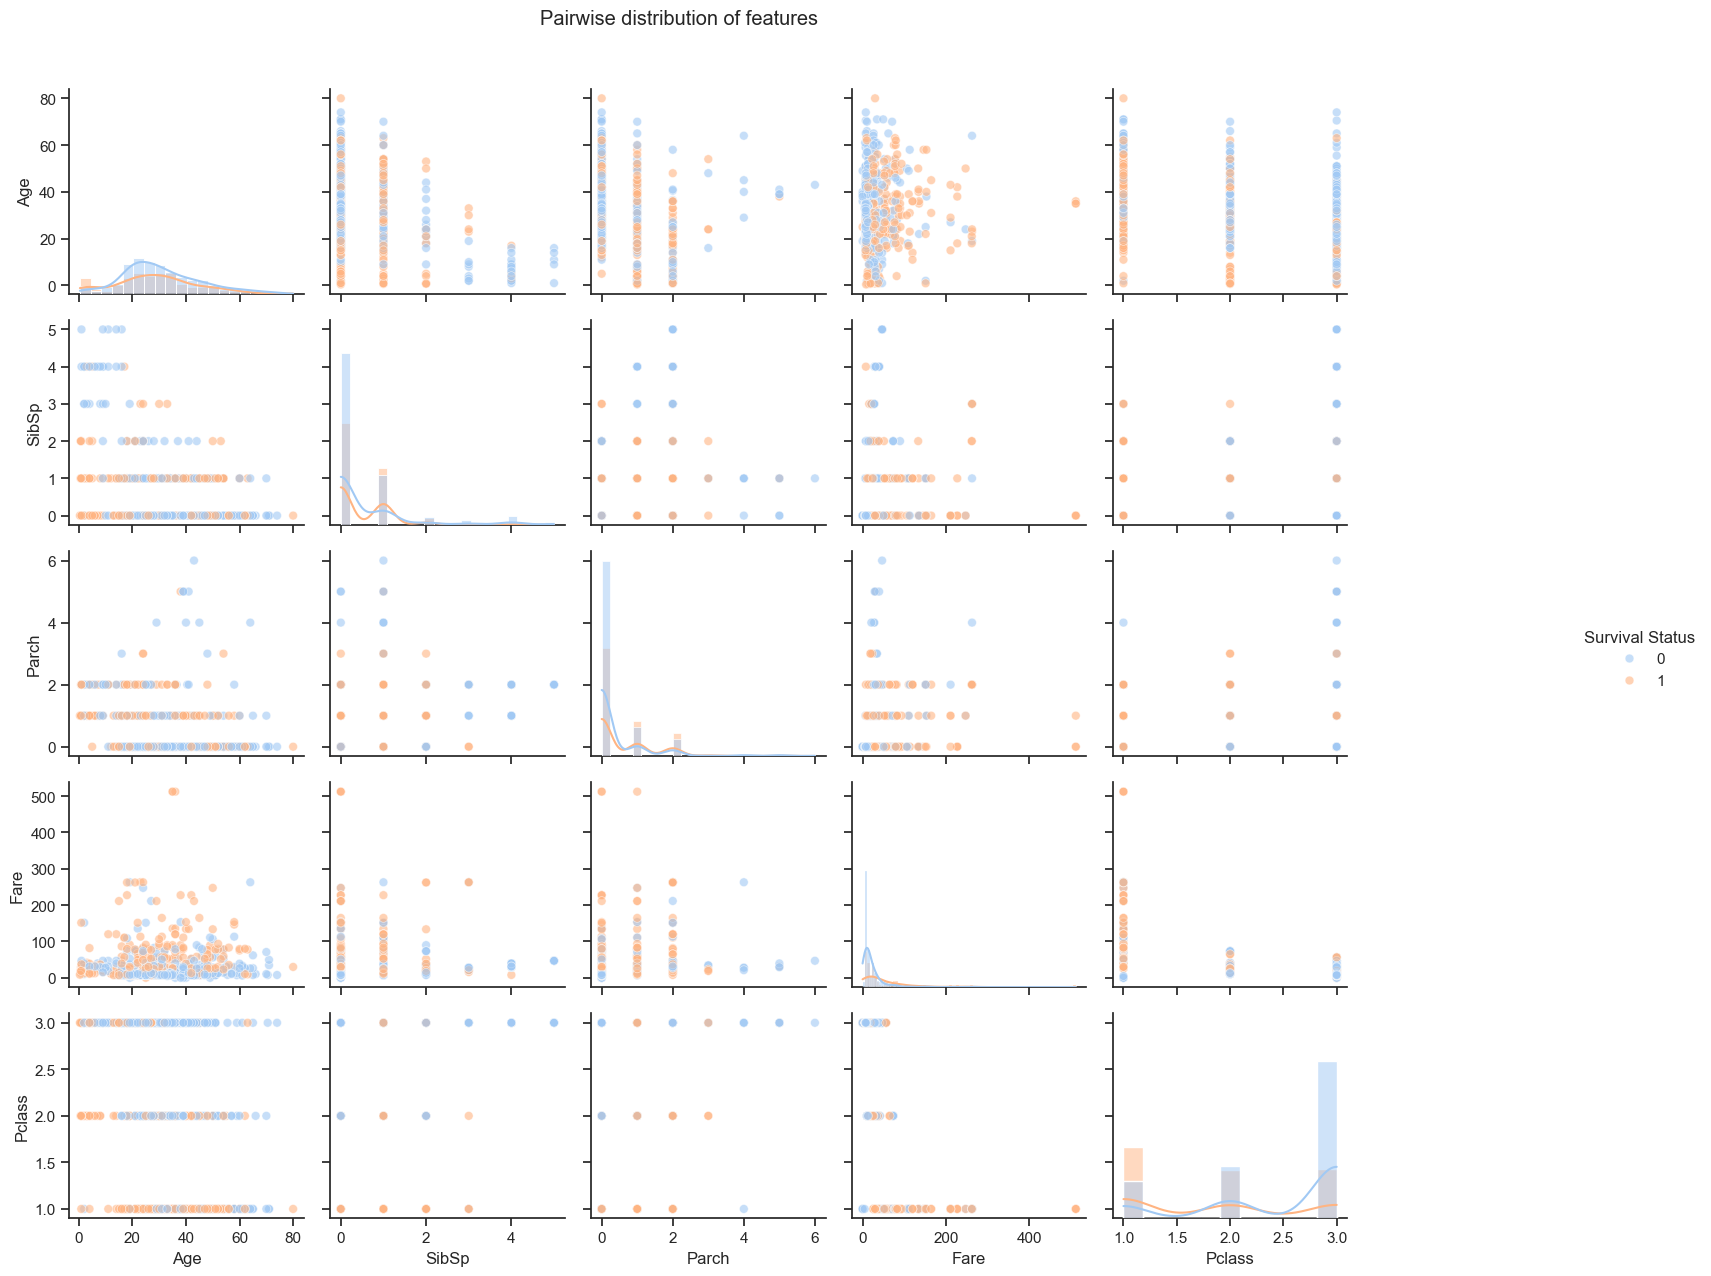

In [65]:
# Define the attributes to consider
attributes = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass']

# Create a PairGrid instead of a pairplot, it gives us more control
pair_grid = sns.PairGrid(df.dropna(subset=attributes), vars=attributes, hue="Survived")
pair_grid = pair_grid.map_diag(sns.histplot, edgecolor="w", kde=True)
pair_grid = pair_grid.map_offdiag(sns.scatterplot, edgecolor="w", s=40, alpha=0.6)

# Adjust titles and labels
pair_grid.fig.suptitle('Pairwise distribution of features', y=1.02)
pair_grid.add_legend(title='Survival Status', loc='center right', bbox_to_anchor=(1.25, 0.5))

# Show the plot with a tight layout
plt.tight_layout()
plt.show()